# Boosting Methods

## Overview

* Ensemble methods
* Boosting methods
* Gradient boosting


In this learning unit we will look at a particular method of ensemble building - boosting. This approach involves building up a group of models, taking into account how well they perform along the way, and adjusting the dataset properties as we go.

# Ensemble methods

> "The idea is to use the weak learning method several times to get a succession of hypotheses, each one refocused on the examples that the previous ones found difficult and misclassified. … Note, however, it is not obvious at all how this can be done"

\- Leslie Variant, Probably Approximately Correct

* Multiple weak learners
    * Better than at-chance performance
* Aggregate their output
    * Mode of model predictions for classification
    * Mean for regression

The question of how to use many simple models together came from the formulation of probabilistic, approximate learning (PAC learning), which formalizes machine learning algorithms in the context of computer science, with provable bounds on computation time and performance.

The general idea behind ensemble methods is that, rather than have one single model, you can take a collection of them and aggregate their output.

This results in stronger performance: "the wisdom of crowds".

Ensemble methods can be applied to both classification and regression, but here we will only consider classification.

## Ensemble methods: bagging

* Train $n$ models on subsets of the data - bootstrap
    * Subsets created by sampling with replacements
* Classify any new data point based on the most common prediction - aggregate
* Because this technique takes many uncorrelated learners to make a final model, it reduces error by reducing variance. 

The most straight-forward application of this is in bagging.

The data is split up into subsets, a model is then trained on each one.

Each model is used to classify new data points. The most common output amongst all the models is the final one used.

## Ensemble methods: Boosting

* Boosting is an ensemble technique in which the predictors are not made independently, but **sequentially**.
* Main idea: Instead of using random data subsets, **focus on difficult data samples**, that previous models got wrong.
* Subsequent predictors learn from the mistakes of the previous predictors. 

Boosting ensures that observations have an unequal probability of appearing in subsequent models, and ones with the highest error appear most. In this way, the observations are not chosen based on the bootstrap process, but based on the error.

## The Boosting Problem

 * Boosting was inspired by the theory of **Probably Approximately Correct (PAC)** analysis of algorithms.
 * PAC learning defines the goals of machine learning in terms of computational and performance bounds.
 * **PAC algorithm**: for any data distribution, with polynomially many random samples, the algorithm finds hypotheses with limited prediction error with high probability.

## Ensemble methods: Boosting

Start with ensemble $H$ with a single trained classifier $h_1$

1. Create new dataset with emphasis on items $H$ got wrong
2. Train a new classifier $h_2$ on this dataset, add to $H$

Repeat until $H$ contains $k$ models

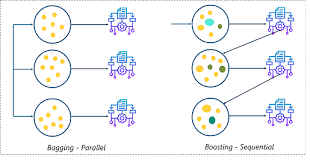

Boosting is different to bagging in that, instead of training many models at once, one is trained at a time and added to the ensemble.

Each time one is trained, the data is weighted to give more importance to the items that the previous model got wrong.

This boosts the ability of the weak learners to learn from the data.

## Ensemble methods: Boosting

For new data:

1. Each model in the ensemble makes a prediction
2. Weight predictions into final output

We weight predictions differently, so they contribute more/less to the final outcome.

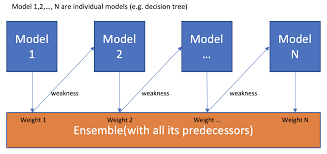

The end result is a collection of models, all trained on the same data, but with a focus on different parts of that data.

The final decision is made by taking the most common prediction overall.

A model's prediction could also be weighted.

## Boosting: implementation details

* Both the classifiers and the data samples are weighted in boosting
* There are two main questions for the algorithm:
    * What weights to use for the data in each new individual model?
    * What weights to use for individual classifiers in the final prediction?
* As boosting was inspired by the theory of PAC learning bounds, weights are designed to allow for formal proofs

While the idea behind boosting is quite simple and intuitive, the methods which determine how the data and classifiers are weighted can be quite involved.

We will now look at two popular methods: AdaBoost and Gradient Boosting.

## AdaBoost - data weighting

**Ada**ptive **Boost**ing weights the data exponentially. In each iteration:

* For each data point $x_i$
    * Correct classification is $y_i \in \{-1, +1\}$
    * Classifier makes hypothesis $h_t(x_i) \in \{-1, +1\}$
    * Calculate $e$, the sum of the weights of incorrect items divided by sum of all weights
        * Initial weights are all equal to 1.

In the binary classification setting, each model in the ensemble generates a hypothesis about what class each data point will be: -1 or +1.

These predictions are used to calculate the overall error.

## AdaBoost - data weighting

If $h_t(x_i) = y_i$:
* $w_{i+1} = w_i\sqrt{\frac{e}{1-e}} $

If $h_t(x_i) \neq y_i$:
* $w_{i+1} = w_i\sqrt{\frac{1-e}{e}} $

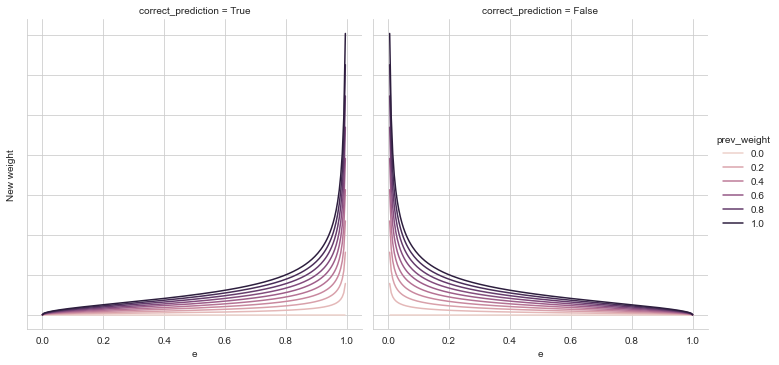

## AdaBoost - model weighting

Models are also weighted exponentially.

In each iteration:

* For each model in ensemble
    * Calculate error rate $e$ with respect to weighted training data
    * Set model weight $\alpha$ to $\frac{1}{2}\ln(\frac{1-e}{e})$
    * **Lower error, higher weight**

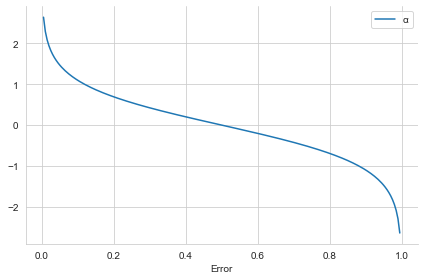

Individual models in the ensemble are weighted too, according to their performance.

The votes of models which have higher accuracy are given preference in the final ensemble.

The weight is used as a coefficient in the final ensemble model.

The exponential weighting ensures models that are *very* wrong or *very* right are weighted (in the appropriate direction) more than models which are just *a bit* wrong or right.

## Gradient Boosting

* Adaboost was designed with a specific (exponential) loss function for the ensemble prediction:
$$min_{w,\alpha} \ e^{-y F(x)}$$
* Gradient Boosting is a generalisation of AdaBoost, for any cost/loss function (e.g. MSE)
* When combining the individual predictions $f(x,w_k)$, we want to minimise the ensemble prediction $F(x)$ with a weighted average:
$$min_{w,\alpha} \ L\left( y, \sum_{k=1}^N \alpha_k f(x,w_k) \right)$$
* In Gradient Boosting, at each iteration $k$, we greedily add the predictions $f(x,w_k)$ of the $k$-th individual model to the previous ensemble prediction $\hat{y}_{k-1}$, and optimize using gradient descent: 
$$min_{w_k,\alpha_k} \ L\left( y, \hat{y}_{k-1} + \alpha_k f(x,w_k) \right)$$


More generally, boosting can be viewed as an optimisation problem, where the aim is to minimise a function (in this case, the error of the ensemble), and this can be solved through gradient descent. At each iteration, we optimize the new individual decision tree so that this additive prediction is optimal.

## Gradient Boosting algorithm

* In Gradient Boosting, we need the gradient of the loss function over the tree parameters, which is not tractable.
* We use instead the prediction gradient as **pseudo-residuals**, for sample $i$ and tree $k$: $$r_{ik} = -\frac{\partial L(y_i, \hat{y}_i)}{\partial \hat{y}_i} \bigg|_{\hat{y}_i = F_{k-1}(x_i)}$$

* Use the pseudo-residual as classification or regression targets for training the $k$-th tree $f(x,w_k)$, with **training data** $\{(x_i,r_{ik})\}_{i=1}^n$.

* For MSE loss, the target is simply the residual error $$r_{ik} = (y_i - F_{k-1}(x_i))$$.

* Once the new tree is trained, we fit its weight $\alpha_k$ that minimizes the loss, $$min_{\alpha_k} \ L\left( y, \hat{y}_{k-1} + \alpha_k f(x,w_k) \right)$$


As we can't calculate the gradient to the tree parameters, we use the gradient as surrogate targets. It finds the tree with predictions most parallel with the gradient of the loss.
 
Further reading: [XGBoost: A Scalable Tree Boosting System (2016)](https://arxiv.org/abs/1603.02754)

## Boosting in practice

* Very good performance
* Prone to overfitting
    * But regularisation can help
* Not directly interpretable
    * But can determine which features are most important to the ensemble's performance
    * See tools like SHAP (https://github.com/slundberg/shap) and LIME (https://github.com/marcotcr/lime)

Gradient Boosting approaches are popular due to their very good performance.

They are prone to overfitting - additional learners in the ensemble reduce bias, but adding too many learners to the ensemble starts to increase variance.

One issue is that they are a "black box" method, and their decisions are not directly interpretable.

There are several "interperability" packages available. A recent one is `shap`, which combines multiple approaches, from a variety of interpretability methods, to determine which features contribute most/least to the outcome of a classifier. `shap` also generates useful diagram versions of this, showing how features push/pull model output when compared to a baseline. Knowing which features contribute most to a model's success/failure can be very useful if you are responsible for gathering data - it can inform you as to where your focus should be in future, for example.

## Boosting in practice

* Performance improvement over iterations for a digits classification task:

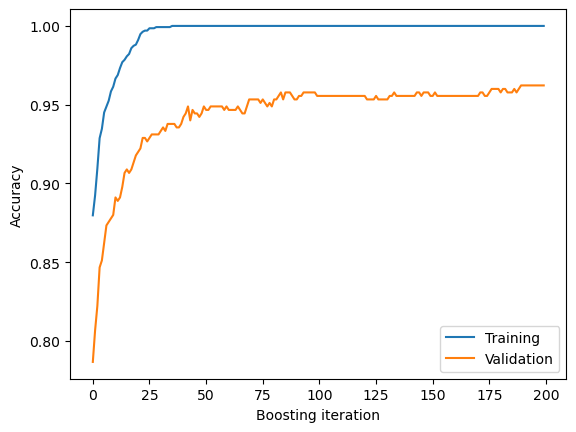

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
import sklearn.datasets
import matplotlib.pyplot as plt
import numpy as np

data = sklearn.datasets.load_digits()

X_train, X_test, y_train, y_test = train_test_split(data['data'], data['target'], random_state=0)

gbc = GradientBoostingClassifier(n_estimators=200)
gbc.fit(X_train, y_train)

plt.plot([np.mean(np.equal(preds,y_train)) for preds in gbc.staged_predict(X_train)]);
plt.plot([np.mean(np.equal(preds,y_test)) for preds in gbc.staged_predict(X_test)]);
plt.legend(["Training", "Validation"],loc="lower right")
plt.xlabel("Boosting iteration")
plt.ylabel("Accuracy");
#plt.ylim(0.8,1)
#plt.xlim(0,50);

In this simple implementation with `sklearn` we see the accuracy score from the training and validation set at each iteration of the boosting algorithm, for an image recognition task. Even though decision trees are not especially effective for image recognition, we see that with 200 trees, learned sequentially, the model achieves much higher performance than a single tree.

## Boosting in practice

* Many Python packages for different boosting algorithms
    * `sklearn.ensemble`
    * `XGBoost`
    * `LightGBM`
    * `Catboost`
* In general, boosting is hard, if not impossible, to parallelise, but libraries like `XGBoost`/`Catboost` offer GPU support, which can help with larger datasets.

There are many implementations of boosting ensembles in Python. `sklearn` has a general implementation which can use any type of model in the ensemble.

Other specific packages are available. These all use decision trees as ensemble members and are highly optimised for performance. They generally use a very similar setup to `sklearn` too and it is easy to integrate them with `sklearn` utilities like metrics, grid search, and so on.

### XGBoost package

* Boosting package which includes many advancements in terms of performance and computational efficiency:
    * Special handling of **sparse data**: important for one-hot encoding
    * **Column blocks** for parallel learning: pre-sorting samples by feature value for faster threshold finding
    * **Out-of-core** computation: handles datasets larger than main memory
    * **Regularization**: Many methods to optimize the generalization performance 

Further reading: https://xgboost.ai/

## Jupyter Exercise

Boosting

Open `boosting-practical.ipynb`